# TP - Analyse en composantes principales

## Données
Analyse en composantes principales sur un jeu de données qui contient les performances
réalisées par des athlètes lors de deux compétitions d'athlétisme qui on eu lieu a un mois
d'intervalle: les jeux Olympiques d'Athènes et le Décastar en 2004.<br\>
<br\>
Le tableau contient pour chaque athlète, ses performances à 10 épreuves, son classement
final, son nombre de points final et la compétition à laquelle il a participée.<br\>
<br\>
Les données sont dans le package **FactoMineR**, on les récupére avec la commande **data**:<br\>

## Objectifs
L'objectif de l'ACP sur ce jeu de données est de déterminer des profils de performances
similaires:<br\>
<br\>
* **Etude des individus**: 
    - Peut-on déterminer des profils d'athlètes? 
    - Peut-on opposer un groupe d'individus à un autre?
    - Est ce que certaines épreuves se ressemblent : si un athlète est performant pour une
épreuve, est-il plutôt performant pour une autre?<br\>
<br\>
* **Etude des variables **: 
    - Peut-on résumer les performances des athlètes par un petit nombre
de variables?
    - Lien entre les deux études: peut-on caractériser un groupe d'individus par un petit nombre de variables?

## Traitements
Les différents étapes que nous vous conseillons pour cette étude sont les suivantes:
### Importer le jeu de données.

In [5]:
# Chargement des données de l'etude decathlon
.libPaths("/home/viryl/R/lib")
library(FactoMineR)
data(decathlon)
ls()

[1] "decathlon"

### Traitements descriptifs
* Faire un traitement descriptif univarié et bivarié sur ces données. Une bonne connaissance des données sera une aide à l'interprétation de l'ACP.

In [49]:
# Traitement avec R
summary(decathlon)

      100m         Long.jump       Shot.put       High.jump          400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
  110m.hurdle        Discus        Pole.vault       Javeline    
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M

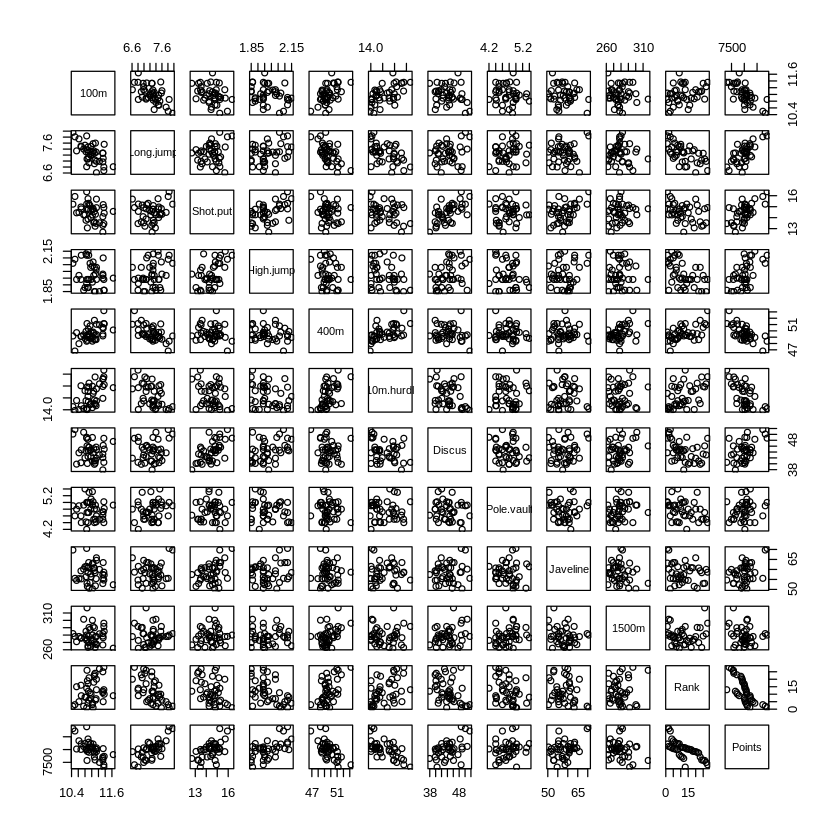

In [50]:
# Scaterplot
pairs(decathlon[,1:12])

In [51]:
# Correlation
cor(decathlon[,1:12])

100m        Long.jump   Shot.put    High.jump   400m        
100m         1.00000000 -0.59867767 -0.35648227 -0.24625292  0.520298155
Long.jump   -0.59867767  1.00000000  0.18330436  0.29464444 -0.602062618
Shot.put    -0.35648227  0.18330436  1.00000000  0.48921153 -0.138432919
High.jump   -0.24625292  0.29464444  0.48921153  1.00000000 -0.187956928
400m         0.52029815 -0.60206262 -0.13843292 -0.18795693  1.000000000
110m.hurdle  0.57988893 -0.50541009 -0.25161571 -0.28328909  0.547987756
Discus      -0.22170757  0.19431009  0.61576810  0.36921834 -0.117879365
Pole.vault  -0.08253683  0.20401411  0.06118185 -0.15618074 -0.079292469
Javeline    -0.15774645  0.11975893  0.37495551  0.17188009  0.004232096
1500m       -0.06054645 -0.03368613  0.11580306 -0.04490252  0.408106432
Rank         0.29670366 -0.60405452 -0.36996958 -0.49276873  0.562118543
Points      -0.68427243  0.72513490  0.62738936  0.57670316 -0.666939955
            110m.hurdle  Discus     Pole.vault   Javeline     1500m      
100m         0.579888931 -0.2217076 -0.082536834 -0.157746452 -0.06054645
Long.jump   -0.505410086  0.1943101  0.204014112  0.119758933 -0.03368613
Shot.put    -0.251615714  0.6157681  0.061181853  0.374955509  0.11580306
High.jump   -0.283289090  0.3692183 -0.156180742  0.171880092 -0.04490252
400m         0.547987756 -0.1178794 -0.079292469  0.004232096  0.40810643
110m.hurdle  1.000000000 -0.3262010 -0.002703885  0.008743251  0.03754024
Discus      -0.326200961  1.0000000 -0.150072400  0.157889799  0.25817510
Pole.vault  -0.002703885 -0.1500724  1.000000000 -0.030000603  0.24744778
Javeline     0.008743251  0.1578898 -0.030000603  1.000000000 -0.18039313
1500m        0.037540240  0.2581751  0.247447780 -0.180393128  1.00000000
Rank         0.439102281 -0.3891251 -0.320379567 -0.208094646  0.08989781
Points      -0.644460200  0.4841830  0.197436342  0.422393176 -0.19434860
            Rank        Points    
100m         0.29670366 -0.6842724
Long.jump   -0.60405452  0.7251349
Shot.put    -0.36996958  0.6273894
High.jump   -0.49276873  0.5767032
400m         0.56211854 -0.6669400
110m.hurdle  0.43910228 -0.6444602
Discus      -0.38912515  0.4841830
Pole.vault  -0.32037957  0.1974363
Javeline    -0.20809465  0.4223932
1500m        0.08989781 -0.1943486
Rank         1.00000000 -0.7391835
Points      -0.73918347  1.0000000

### ACP
* Choisir les variables et les individus actifs.
* Faut-il standardiser ou pas les variables actives?

* A l'issue de ces choix, effectuer l'ACP.

In [6]:
# ACP avec R
# Utilisation du package FactoMineR
help("PCA")

In [7]:
decathlon.pca <- PCA(decathlon[,1:10])

In [8]:
# decathlon.pca est un objet de type "PCA" et "list"
# on observe ses composantes
attributes(decathlon.pca)

$names
[1] "eig"  "var"  "ind"  "svd"  "call"

$class
[1] "PCA"   "list "

* Utiliser la variable "Competition" (13) et les variables quantitatives "Rank" et "Points" comme illustratives pour l'aide a l'interpretation

In [9]:
decathlonSup.pca <- PCA(decathlon, quali.sup=13,quanti.sup=11:12)

### Analyse des résultats
* Choisir le nombre d'axes à analyser : afficher les valeurs propres et construire le graphiques des valeurs propres.

In [16]:
dim(decathlon.pca$eig)

[1] 10  3

eigenvalue percentage of variance cumulative percentage of variance
comp 1  3          33                      33                              
comp 2  2          17                      50                              
comp 3  1          14                      64                              
comp 4  1          11                      75                              
comp 5  1           7                      82                              
comp 6  1           6                      88                              
comp 7  0           5                      92                              
comp 8  0           4                      96                              
comp 9  0           2                      98                              
comp 10 0           2                     100

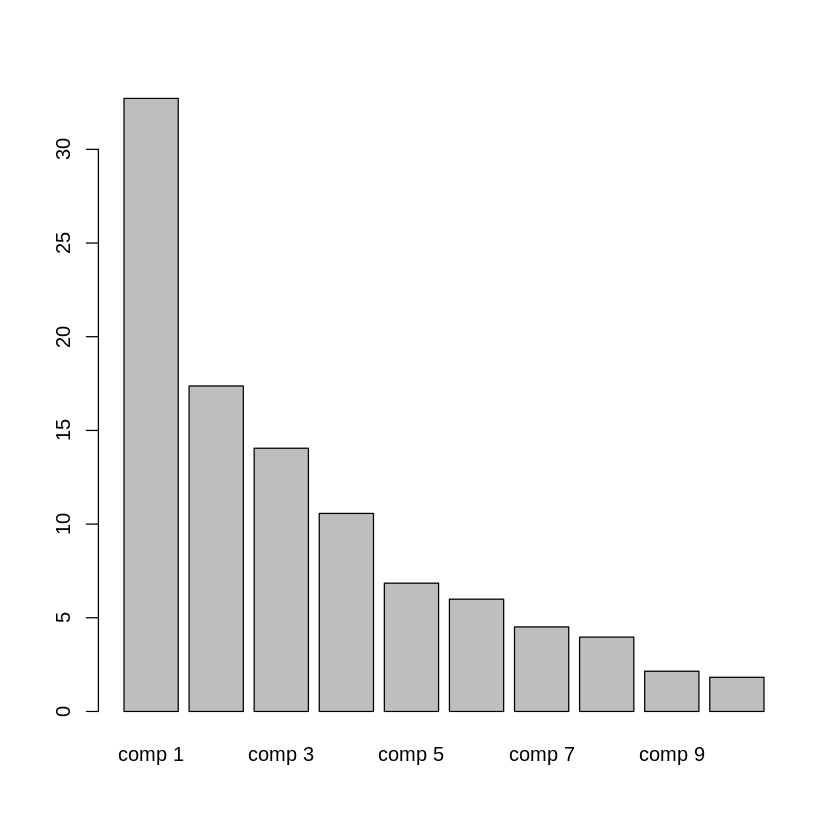

In [15]:
# Choisir les axes
barplot(decathlon.pca$eig[,2])
round(decathlon.pca$eig)

* Observer les individus dans le premier plan factoriel.
* Positionner les modalités d'une variable illustrative qualitative.

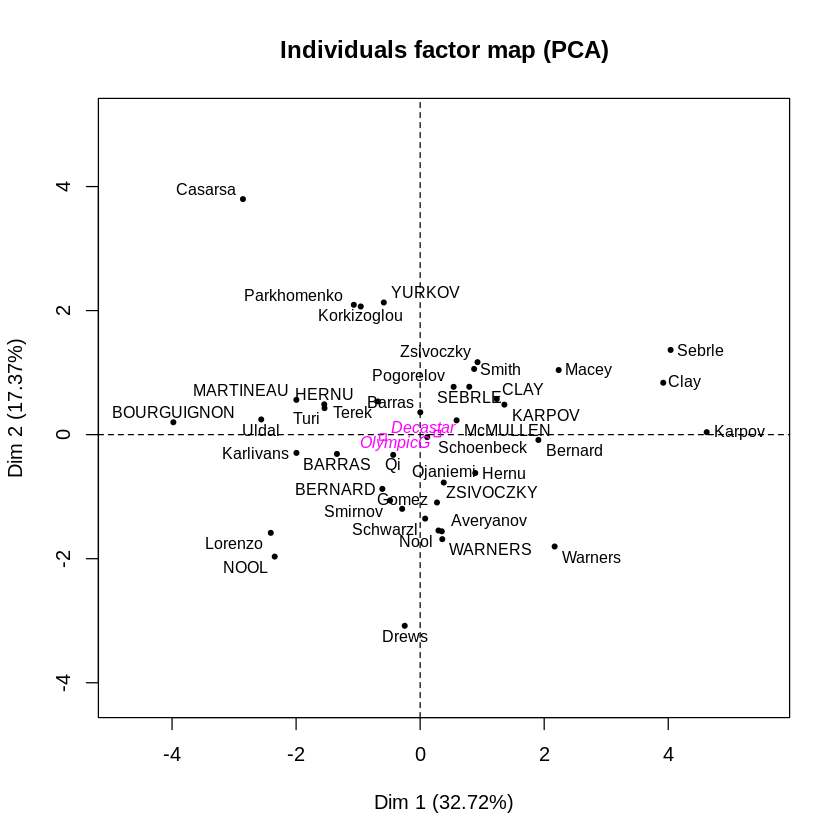

In [17]:
plot(decathlonSup.pca, choix="ind",cex=0.8)

In [19]:
plot(decathlonSup.pca, choix="ind", habillage=13,cex=0.8)

In [59]:
# Individu sur les axes 3 et 4
plot(decathlon.pca, choix="ind", habillage=13,cex=0.8,axes=3:4)

* Construire le cercle de corrélations.
* Positionner des variables illustratives quantitatives dans le cercle des corrélations.

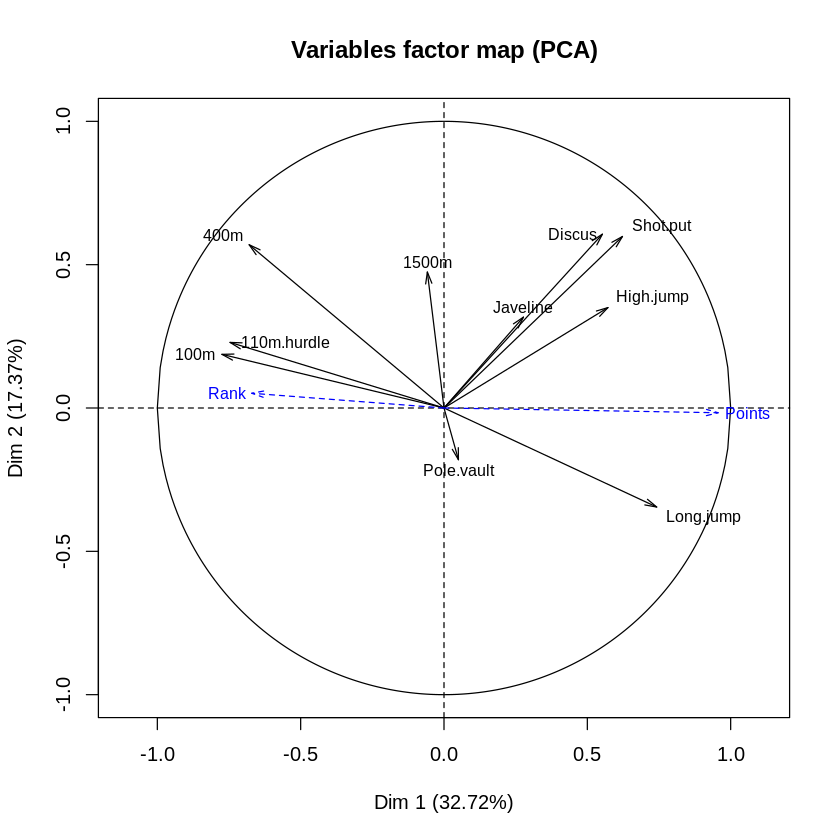

In [60]:
plot(decathlon.pca, choix="var",cex=0.8)

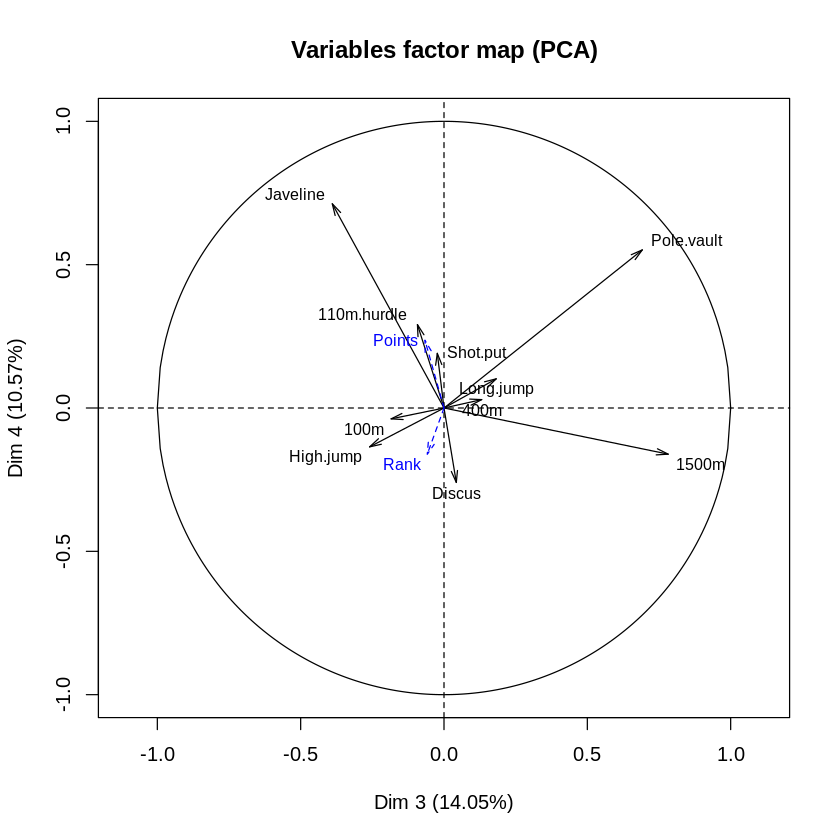

In [23]:
plot(decathlonSup.pca, choix="var",cex=0.8,axes=3:4)

* Décrire les principales dimensions de variabilité

In [21]:
# Decrire les principales dimensions de variabilite
dimdesc(decathlon.pca,axes=1:5)

$Dim.1
$Dim.1$quanti
            correlation      p.value
Long.jump     0.7418997 2.849886e-08
Shot.put      0.6225026 1.388321e-05
High.jump     0.5719453 9.362285e-05
Discus        0.5524665 1.802220e-04
400m         -0.6796099 1.028175e-06
110m.hurdle  -0.7462453 2.136962e-08
100m         -0.7747198 2.778467e-09


$Dim.2
$Dim.2$quanti
          correlation      p.value
Discus      0.6063134 2.650745e-05
Shot.put    0.5983033 3.603567e-05
400m        0.5694378 1.020941e-04
1500m       0.4742238 1.734405e-03
High.jump   0.3502936 2.475025e-02
Javeline    0.3169891 4.344974e-02
Long.jump  -0.3454213 2.696969e-02


$Dim.3
$Dim.3$quanti
           correlation      p.value
1500m        0.7821428 1.554450e-09
Pole.vault   0.6917567 5.480172e-07
Javeline    -0.3896554 1.179331e-02


$Dim.4
$Dim.4$quanti
           correlation      p.value
Javeline     0.7122773 1.761578e-07
Pole.vault   0.5515340 1.857748e-04


$Dim.5
$Dim.5$quanti
           correlation      p.value
High.jump    0.5554396 0.0001635051
Pole.vault   0.3299593 0.0351316637